## Import files

In [1]:
import os
import logging
import pandas as pd
import numpy as np
import glob

BASIC_PATH = '../Data/'
ALL_FILES = BASIC_PATH + '*.csv'

def readAllFiles():
    files = glob.glob(ALL_FILES)
    frames = []

    for file in files[0:2]:
        df = pd.read_csv(file, index_col = 0)
        frames.append(df)

    return pd.concat(frames)

data = readAllFiles()
print("Aantal records om te beginnen:", len(data))
data = pd.DataFrame(data=data, columns=["departure_schedule", "arrival_schedule", "duration", "distance"])

Aantal records om te beginnen: 2000000


## Calculate duration of flight

In [11]:
import math

def getTotalMinutes(time):
    time_str = str(int(time))
    if len(time_str) == 4:
        hours = time_str[0:2]
    else:
        hours = time_str[0:1]
    hours = int(hours)
        
    minutes = int(time_str[-2:])
    totalMinutes = minutes + hours * 60
    return totalMinutes

def getStringTime(totalMinutes):
    hours = math.floor(totalMinutes / 60)
    minutes = totalMinutes - (hours * 60)
    return str(hours) + ":" + str(minutes)

def calcDuration(departure_schedule, arrival_schedule):
    departure = getTotalMinutes(departure_schedule)
    arrival = getTotalMinutes(arrival_schedule)
    if arrival <= departure:
        return (24 * 60) - (departure - arrival)
    else:
        return arrival - departure

durations = []
for i, row in data.iterrows():
    duration = calcDuration(row["departure_schedule"], row["arrival_schedule"])
    durations.append(duration)

data["duration"] = durations

In [9]:
data.sort_values(by=["distance"], ascending=False)

,departure_schedule,arrival_schedule,duration,distance
1089598,1335,1830,295,7974.550210
1372221,1950,1130,0,7974.550210
1791847,1310,1750,280,7974.550210
1652010,1950,1130,0,7974.550210
1294048,1340,1820,280,7974.550210
1945085,1310,1750,280,7974.550210
2276,2055,1125,0,7974.550210
1543689,1950,1130,0,7974.550210
657997,2055,1125,0,7974.550210
349309,1940,1010,0,7974.550210


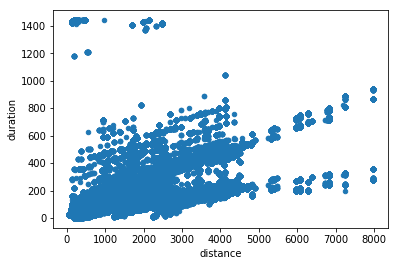

In [12]:
data.plot.scatter(x='distance', y='duration');